#### PREPARE DATA

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("crime.csv")

#### PROCESS DATA

In [3]:
df.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [4]:
df.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031
530651,Vehicle Collision or Pedestrian Struck (with I...,2017,6,6,17.0,38.0,13XX BLOCK PARK DR,Marpole,490204.00,5451444.00,49.215706,-123.134512


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530652 entries, 0 to 530651
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           530652 non-null  object 
 1   YEAR           530652 non-null  int64  
 2   MONTH          530652 non-null  int64  
 3   DAY            530652 non-null  int64  
 4   HOUR           476290 non-null  float64
 5   MINUTE         476290 non-null  float64
 6   HUNDRED_BLOCK  530639 non-null  object 
 7   NEIGHBOURHOOD  474028 non-null  object 
 8   X              530652 non-null  float64
 9   Y              530652 non-null  float64
 10  Latitude       530652 non-null  float64
 11  Longitude      530652 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.6+ MB


In [6]:
df.nunique()

TYPE                 11
YEAR                 15
MONTH                12
DAY                  31
HOUR                 24
MINUTE               60
HUNDRED_BLOCK     21204
NEIGHBOURHOOD        24
X                 95502
Y                 93544
Latitude         101885
Longitude         98972
dtype: int64

This tells us a few things:

1. There are 11 distinct types of crimes in this dataset
2. 24 noted neighbourhoods
3. The count for days and year is valid

In [7]:
df.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y,Latitude,Longitude
count,530652.000000,530652.000000,530652.000000,476290.000000,476290.000000,530652.000000,5.306520e+05,530652.000000,530652.000000
mean,2009.197956,6.450597,15.408590,13.711254,16.940039,441802.149909,4.897663e+06,44.216029,-110.495297
std,4.386272,3.399212,8.750642,6.767744,18.418950,149281.547656,1.654633e+06,14.938004,37.329862
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-124.549757
25%,2005.000000,4.000000,8.000000,9.000000,0.000000,489944.452500,5.453651e+06,49.235573,-123.127194
50%,2009.000000,6.000000,15.000000,15.000000,10.000000,491499.240000,5.456840e+06,49.264251,-123.107128
75%,2013.000000,9.000000,23.000000,19.000000,30.000000,493547.210000,5.458638e+06,49.280441,-123.065932
max,2017.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06,49.755314,0.000000


In [8]:
df.shape

(530652, 12)

In [9]:
df.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

24 noted neighbourhoods

CLEANING DATA 

In [10]:
df_drop = ['X', 'Y', 'Latitude', 'Longitude', 'MINUTE']

In [11]:
df.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
df.drop(columns=df_drop)

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona
...,...,...,...,...,...,...,...
530647,Break and Enter Residential/Other,2017,3,3,9.0,31XX ADANAC ST,Hastings-Sunrise
530648,Mischief,2017,5,29,22.0,14XX E 7TH AVE,Grandview-Woodland
530649,Offence Against a Person,2017,4,13,NaN,OFFSET TO PROTECT PRIVACY,NaN
530650,Theft from Vehicle,2017,6,5,17.0,8XX HAMILTON ST,Central Business District


In [13]:
df.columns

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude'],
      dtype='object')

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

TYPE             0
YEAR             0
MONTH            0
DAY              0
HOUR             0
MINUTE           0
HUNDRED_BLOCK    0
NEIGHBOURHOOD    0
X                0
Y                0
Latitude         0
Longitude        0
dtype: int64

#### ANALYZE DATA

HOW MANY NEIGHBOURHOODS ARE IN THE DATASET

In [16]:
print('There are ' + str(df.NEIGHBOURHOOD.nunique()) + ' listed neighbourhoods, and they are:')
print(df.NEIGHBOURHOOD.unique())

There are 24 listed neighbourhoods, and they are:
['Strathcona' 'Kerrisdale' 'Dunbar-Southlands' 'Grandview-Woodland'
 'Sunset' 'West End' 'Central Business District' 'Hastings-Sunrise'
 'Victoria-Fraserview' 'Fairview' 'Kensington-Cedar Cottage'
 'West Point Grey' 'Shaughnessy' 'Renfrew-Collingwood' 'Killarney'
 'Riley Park' 'Arbutus Ridge' 'Musqueam' 'Mount Pleasant' 'Kitsilano'
 'Stanley Park' 'South Cambie' 'Marpole' 'Oakridge']


WHAT IS THE HIGHEST CRIME COMMITED 

In [17]:
barplot = pd.DataFrame([df['NEIGHBOURHOOD'], df['TYPE'], df['YEAR']]).T
barplot.head()


,NEIGHBOURHOOD,TYPE,YEAR
0,Strathcona,Other Theft,2003
1,Strathcona,Other Theft,2003
2,Strathcona,Other Theft,2003
3,Strathcona,Other Theft,2003
4,Strathcona,Other Theft,2003


In [18]:
crimerate = df['TYPE'].value_counts()
crimerate

Theft from Vehicle                                        170889
Mischief                                                   70157
Break and Enter Residential/Other                          60856
Other Theft                                                52160
Theft of Vehicle                                           38351
Break and Enter Commercial                                 33841
Theft of Bicycle                                           25620
Vehicle Collision or Pedestrian Struck (with Injury)       21887
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Name: TYPE, dtype: int64

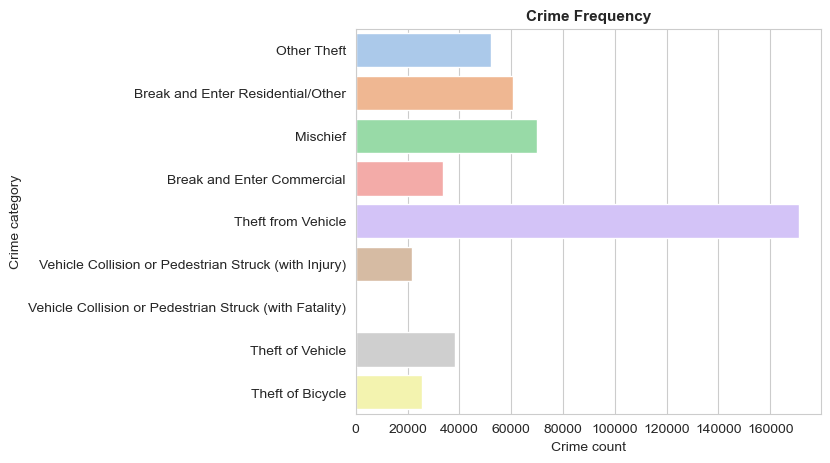

In [19]:
crimerate_countplt, crime_ax  = plt.subplots(figsize=(6,5))

sns.countplot(y=df['TYPE'], ax = crime_ax, palette='pastel')

plt.title('Crime Frequency', fontweight = 'bold', fontsize = '11')
plt.xlabel('Crime count')
plt.ylabel('Crime category')
plt.show()



Analysis from this dataset show that Theft from Vehicle is the highest crime in vancouver from 2003-2017

HOW MANY CRIMES WERE COMMITED IN EACH NEIGHBOURHOOD?

In [20]:
neighbourhood = pd.DataFrame([df['NEIGHBOURHOOD'], df['TYPE']]).T
neighbourhood.head()

,NEIGHBOURHOOD,TYPE
0,Strathcona,Other Theft
1,Strathcona,Other Theft
2,Strathcona,Other Theft
3,Strathcona,Other Theft
4,Strathcona,Other Theft


In [21]:
neighbourhoodT = neighbourhood.groupby(['NEIGHBOURHOOD']).count().reset_index()
neighbourhoodT.columns = ['Neighbourhood', 'Total']
neighbourhoodT


,Neighbourhood,Total
0,Arbutus Ridge,6066
1,Central Business District,110945
2,Dunbar-Southlands,7746
3,Fairview,32161
4,Grandview-Woodland,27180
5,Hastings-Sunrise,18126
6,Kensington-Cedar Cottage,24941
7,Kerrisdale,7447
8,Killarney,10475
9,Kitsilano,26698


In [22]:
ndf = pd.DataFrame(neighbourhoodT)

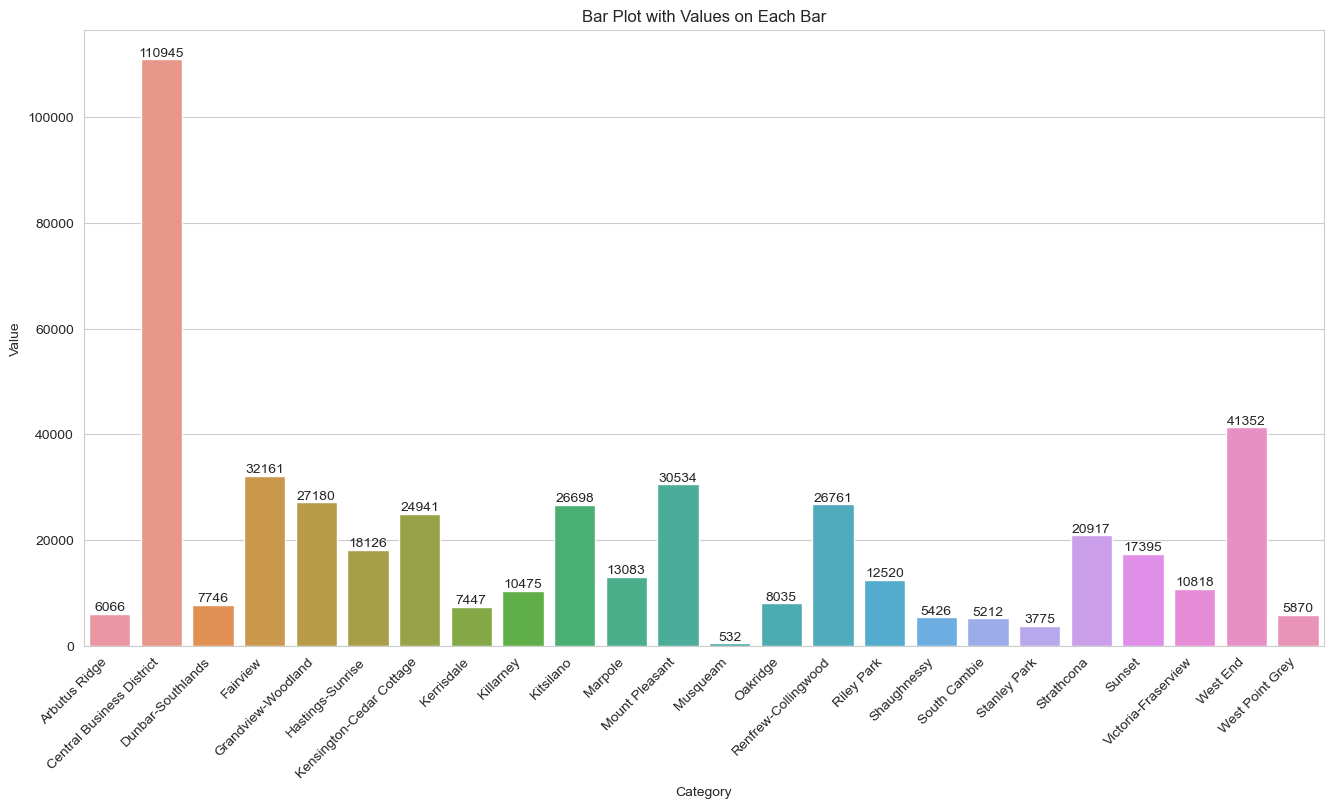

In [23]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Neighbourhood', y='Total', data=ndf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Add values on top of each bar
for p in ax.patches:
    tot = int(p.get_height())
    ax.annotate(f'{tot}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Plot with Values on Each Bar')
plt.show()

WHAT YEAR HAD THE HIGHEST NUMBER OF CRIMES COMMITED?

In [24]:
year = pd.DataFrame([df['YEAR'], df['TYPE']]).T

In [25]:
year.head()

,YEAR,TYPE
0,2003,Other Theft
1,2003,Other Theft
2,2003,Other Theft
3,2003,Other Theft
4,2003,Other Theft


In [26]:
yearT =  year.groupby(['YEAR']).count().reset_index()
yearT.columns = ['Year', 'Total']
yearT



,Year,Total
0,2003,45885
1,2004,45035
2,2005,40522
3,2006,37767
4,2007,33161
5,2008,31070
6,2009,28197
7,2010,25874
8,2011,24633
9,2012,25378


from this data frame we can see that 2003 has the highest crime count

VISUALIZATION OF DATAFRAME

In [27]:
df = pd.DataFrame(yearT)

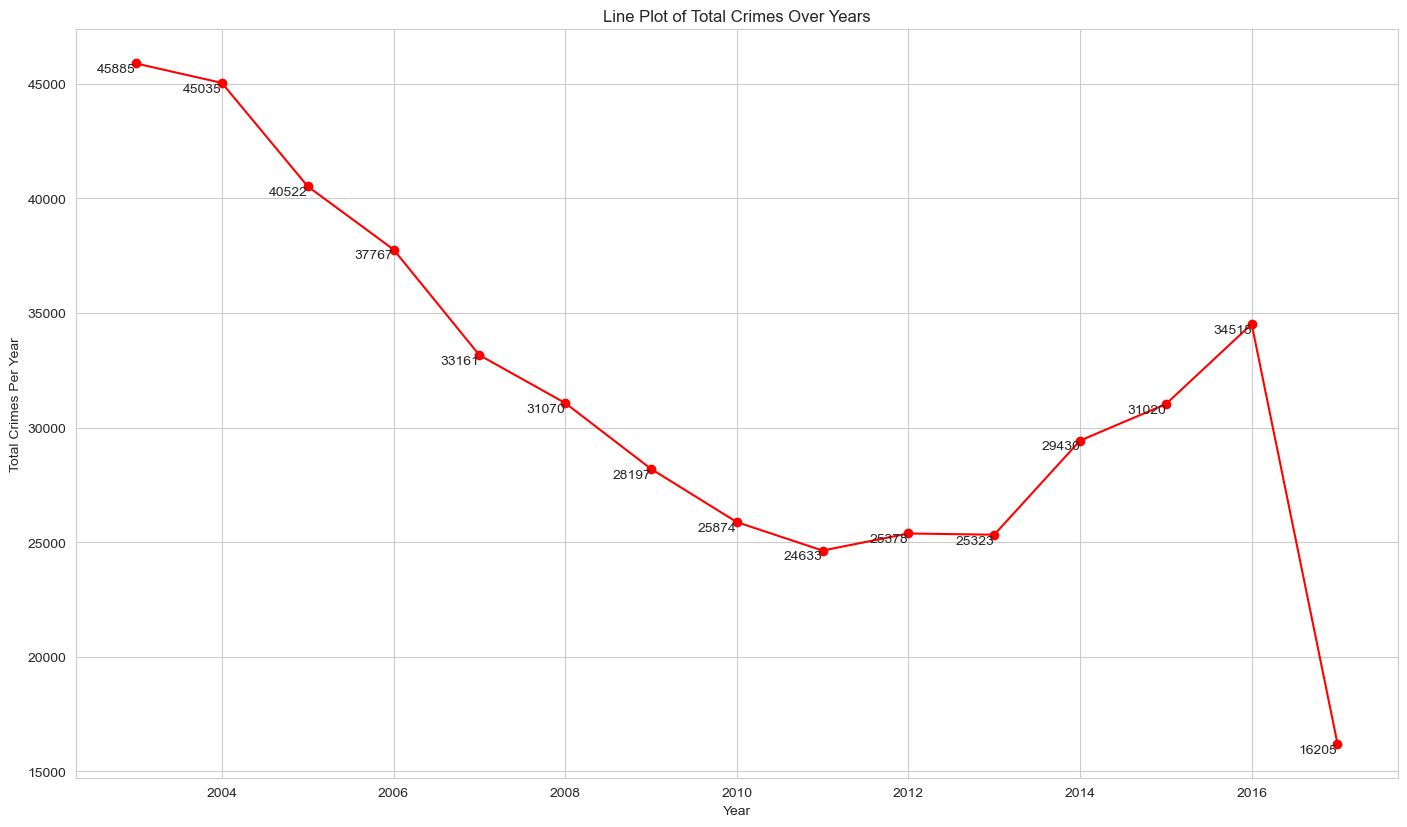

In [28]:
plt.figure(figsize=(14,8))

plt.plot(df['Year'], df['Total'], marker = 'o', linestyle ='-', color = 'red')
label_offset = 4
for index, row in df.iterrows():
    plt.text(row['Year'], row['Total']+ label_offset, str(row['Total']), ha = 'right', va='top')


plt.grid(True)    
plt.tight_layout()
plt.xlabel('Year')
plt.ylabel('Total Crimes Per Year')
plt.title('Line Plot of Total Crimes Over Years')
plt.show()

each point represents each value per year

INSIGHT
1.  There is a general increase from 2003 to 2006, followed by a decrease until around 2010, after which there's a mixture of fluctuations, including both increases and decreases.

2. One noticeable anomaly is the sharp drop in the 'Total' scores in 2017, which is significantly lower compared to previous years. This might indicate a special event or a change in data collection or reporting methods in that particular year.

In [29]:
# Sample data

dfy = pd.DataFrame(yearT)

# Calculate the annual growth rate and add it as a new column
dfy['Annual Growth Rate'] = dfy['Total'].pct_change() * 100  # Calculate as a percentage

# Display the DataFrame with the growth rate column
print(dfy)


    Year  Total  Annual Growth Rate
0   2003  45885                 NaN
1   2004  45035           -1.852457
2   2005  40522          -10.021095
3   2006  37767           -6.798776
4   2007  33161          -12.195832
5   2008  31070           -6.305600
6   2009  28197           -9.246862
7   2010  25874           -8.238465
8   2011  24633           -4.796321
9   2012  25378            3.024398
10  2013  25323           -0.216723
11  2014  29430           16.218458
12  2015  31020            5.402650
13  2016  34515           11.266925
14  2017  16205          -53.049399


Here's a summary of the growth rates for each year:

1. In 2004, there was a decrease of approximately -1.85% compared to 2003.
2. In 2005, there was a decrease of approximately -10.02% compared to 2004.
3. In 2006, there was a decrease of approximately -6.80% compared to 2005.
4. In 2007, there was a decrease of approximately -12.20% compared to 2006.
5. In 2008, there was a decrease of approximately -6.31% compared to 2007.
6. In 2009, there was a decrease of approximately -9.25% compared to 2008.
7. In 2010, there was a decrease of approximately -8.24% compared to 2009.
8. In 2011, there was a decrease of approximately -4.80% compared to 2010.
9. In 2012, there was an increase of approximately 3.02% compared to 2011.
10. In 2013, there was a slight decrease of approximately -0.22% compared to 2012.
11. In 2014, there was a significant increase of approximately 16.22% compared to 2013.
12. In 2015, there was an increase of approximately 5.40% compared to 2014.
13. In 2016, there was an increase of approximately 11.27% compared to 2015.
14. In 2017, there was a significant decrease of approximately -53.05% compared to 2016.

## Conclusion


1. From the crime records, we have 24 neighbourhoods in Vancouver and Central Business district is the         neighbourhood with the highest number of crimes.
2. Theft from vehicle is the highest occuring crime in Vancouver with a total of 170889 counts in this dataset.
3. Number of crimes has decreased from 2004 - 2011 but we highlighted the spike in crimes between 2013-2016 and a     sudden drop in 2017.
4. The central business district neighbourhood has the most crime recordings with a total of 110945

